In [1]:
# prepare data for CNN
from pandas import read_csv
from pandas import DataFrame
from numpy import array
from numpy import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# load dataset
dataset = read_csv('fusedData158324.csv', header=0, index_col=0)
mean_value = dataset['vehiclecount'].mean()
dataset['vehiclecount'].fillna(value=mean_value, inplace=True)

values = dataset.values

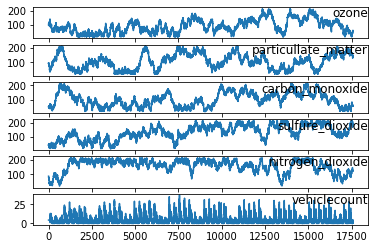

In [4]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [5]:
# ensure all data is float
values = values.astype('float32')

In [6]:
# choose a number of time steps
n_steps = 1

In [7]:
# convert into input/output
X, y = split_sequences(values, n_steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
# reshape the data
n_features = X.shape[2]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * n_features))

In [9]:
...
# define model
model = Sequential()
model.add(Conv1D(filters=8, kernel_size=4, activation='relu', input_shape=(n_steps * n_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# fit model
history = model.fit(x_train, y_train, epochs=700, batch_size=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/700
141/141 - 1s - loss: 32.6827 - val_loss: 25.5853 - 995ms/epoch - 7ms/step
Epoch 2/700
141/141 - 0s - loss: 24.7762 - val_loss: 24.6736 - 313ms/epoch - 2ms/step
Epoch 3/700
141/141 - 0s - loss: 24.1031 - val_loss: 23.9818 - 290ms/epoch - 2ms/step
Epoch 4/700
141/141 - 0s - loss: 23.7063 - val_loss: 24.0617 - 284ms/epoch - 2ms/step
Epoch 5/700
141/141 - 0s - loss: 23.1776 - val_loss: 23.5075 - 301ms/epoch - 2ms/step
Epoch 6/700
141/141 - 0s - loss: 22.3612 - val_loss: 23.0177 - 266ms/epoch - 2ms/step
Epoch 7/700
141/141 - 0s - loss: 21.9347 - val_loss: 22.4291 - 330ms/epoch - 2ms/step
Epoch 8/700
141/141 - 0s - loss: 21.6219 - val_loss: 21.6088 - 255ms/epoch - 2ms/step
Epoch 9/700
141/141 - 0s - loss: 21.2102 - val_loss: 21.3970 - 266ms/epoch - 2ms/step
Epoch 10/700
141/141 - 0s - loss: 20.4242 - val_loss: 20.3041 - 266ms/epoch - 2ms/step
Epoch 11/700
141/141 - 0s - loss: 19.8830 - val_loss: 20.2068 - 284ms/epoch - 2ms/step
Epoch 12/700
141/141 - 0s - loss: 19.6225 - val_loss

Epoch 96/700
141/141 - 0s - loss: 12.6377 - val_loss: 14.3860 - 281ms/epoch - 2ms/step
Epoch 97/700
141/141 - 0s - loss: 12.7078 - val_loss: 13.7201 - 266ms/epoch - 2ms/step
Epoch 98/700
141/141 - 0s - loss: 12.8101 - val_loss: 13.3963 - 267ms/epoch - 2ms/step
Epoch 99/700
141/141 - 0s - loss: 12.7241 - val_loss: 13.5287 - 273ms/epoch - 2ms/step
Epoch 100/700
141/141 - 0s - loss: 12.5760 - val_loss: 13.3353 - 276ms/epoch - 2ms/step
Epoch 101/700
141/141 - 0s - loss: 12.3666 - val_loss: 13.4961 - 283ms/epoch - 2ms/step
Epoch 102/700
141/141 - 0s - loss: 12.5191 - val_loss: 13.8497 - 298ms/epoch - 2ms/step
Epoch 103/700
141/141 - 0s - loss: 12.4556 - val_loss: 13.8741 - 270ms/epoch - 2ms/step
Epoch 104/700
141/141 - 0s - loss: 12.5318 - val_loss: 14.8286 - 283ms/epoch - 2ms/step
Epoch 105/700
141/141 - 0s - loss: 12.4325 - val_loss: 14.0633 - 265ms/epoch - 2ms/step
Epoch 106/700
141/141 - 0s - loss: 12.6383 - val_loss: 13.7519 - 267ms/epoch - 2ms/step
Epoch 107/700
141/141 - 0s - loss: 1

141/141 - 0s - loss: 10.6802 - val_loss: 12.0342 - 315ms/epoch - 2ms/step
Epoch 190/700
141/141 - 0s - loss: 10.6233 - val_loss: 13.0358 - 284ms/epoch - 2ms/step
Epoch 191/700
141/141 - 0s - loss: 10.7781 - val_loss: 12.3840 - 301ms/epoch - 2ms/step
Epoch 192/700
141/141 - 0s - loss: 10.7623 - val_loss: 12.2662 - 291ms/epoch - 2ms/step
Epoch 193/700
141/141 - 0s - loss: 10.6920 - val_loss: 12.7088 - 288ms/epoch - 2ms/step
Epoch 194/700
141/141 - 0s - loss: 10.6970 - val_loss: 13.0230 - 308ms/epoch - 2ms/step
Epoch 195/700
141/141 - 0s - loss: 10.7553 - val_loss: 12.5332 - 286ms/epoch - 2ms/step
Epoch 196/700
141/141 - 0s - loss: 10.7065 - val_loss: 12.2451 - 302ms/epoch - 2ms/step
Epoch 197/700
141/141 - 0s - loss: 10.6859 - val_loss: 12.0862 - 302ms/epoch - 2ms/step
Epoch 198/700
141/141 - 0s - loss: 10.6562 - val_loss: 12.1186 - 283ms/epoch - 2ms/step
Epoch 199/700
141/141 - 0s - loss: 10.4193 - val_loss: 12.2658 - 294ms/epoch - 2ms/step
Epoch 200/700
141/141 - 0s - loss: 10.3097 - v

Epoch 283/700
141/141 - 0s - loss: 9.5763 - val_loss: 11.8067 - 283ms/epoch - 2ms/step
Epoch 284/700
141/141 - 0s - loss: 9.7901 - val_loss: 12.3658 - 296ms/epoch - 2ms/step
Epoch 285/700
141/141 - 0s - loss: 9.7274 - val_loss: 11.9285 - 301ms/epoch - 2ms/step
Epoch 286/700
141/141 - 0s - loss: 9.6370 - val_loss: 11.7135 - 284ms/epoch - 2ms/step
Epoch 287/700
141/141 - 0s - loss: 9.5721 - val_loss: 12.1038 - 283ms/epoch - 2ms/step
Epoch 288/700
141/141 - 0s - loss: 9.5695 - val_loss: 11.6766 - 281ms/epoch - 2ms/step
Epoch 289/700
141/141 - 0s - loss: 9.5607 - val_loss: 11.5011 - 269ms/epoch - 2ms/step
Epoch 290/700
141/141 - 0s - loss: 9.5365 - val_loss: 11.1961 - 267ms/epoch - 2ms/step
Epoch 291/700
141/141 - 0s - loss: 9.6823 - val_loss: 12.0839 - 283ms/epoch - 2ms/step
Epoch 292/700
141/141 - 0s - loss: 9.5002 - val_loss: 12.2061 - 282ms/epoch - 2ms/step
Epoch 293/700
141/141 - 0s - loss: 9.6061 - val_loss: 12.0320 - 267ms/epoch - 2ms/step
Epoch 294/700
141/141 - 0s - loss: 9.5922 -

Epoch 378/700
141/141 - 0s - loss: 9.1277 - val_loss: 11.3054 - 268ms/epoch - 2ms/step
Epoch 379/700
141/141 - 0s - loss: 9.1557 - val_loss: 11.2919 - 267ms/epoch - 2ms/step
Epoch 380/700
141/141 - 0s - loss: 9.1872 - val_loss: 11.5382 - 282ms/epoch - 2ms/step
Epoch 381/700
141/141 - 0s - loss: 9.0236 - val_loss: 11.7792 - 282ms/epoch - 2ms/step
Epoch 382/700
141/141 - 0s - loss: 9.1812 - val_loss: 11.2900 - 269ms/epoch - 2ms/step
Epoch 383/700
141/141 - 0s - loss: 9.1555 - val_loss: 11.6657 - 266ms/epoch - 2ms/step
Epoch 384/700
141/141 - 0s - loss: 9.1472 - val_loss: 11.6472 - 281ms/epoch - 2ms/step
Epoch 385/700
141/141 - 0s - loss: 9.0649 - val_loss: 11.0727 - 280ms/epoch - 2ms/step
Epoch 386/700
141/141 - 0s - loss: 9.0640 - val_loss: 11.5000 - 272ms/epoch - 2ms/step
Epoch 387/700
141/141 - 0s - loss: 9.0926 - val_loss: 11.2028 - 283ms/epoch - 2ms/step
Epoch 388/700
141/141 - 0s - loss: 9.0929 - val_loss: 11.9547 - 331ms/epoch - 2ms/step
Epoch 389/700
141/141 - 0s - loss: 9.0921 -

Epoch 473/700
141/141 - 0s - loss: 8.7564 - val_loss: 10.9299 - 267ms/epoch - 2ms/step
Epoch 474/700
141/141 - 0s - loss: 8.7931 - val_loss: 10.8633 - 267ms/epoch - 2ms/step
Epoch 475/700
141/141 - 0s - loss: 8.6616 - val_loss: 12.2003 - 282ms/epoch - 2ms/step
Epoch 476/700
141/141 - 0s - loss: 8.7940 - val_loss: 11.5092 - 268ms/epoch - 2ms/step
Epoch 477/700
141/141 - 0s - loss: 8.6763 - val_loss: 11.1388 - 278ms/epoch - 2ms/step
Epoch 478/700
141/141 - 0s - loss: 8.6985 - val_loss: 11.1325 - 270ms/epoch - 2ms/step
Epoch 479/700
141/141 - 0s - loss: 8.6449 - val_loss: 11.0234 - 284ms/epoch - 2ms/step
Epoch 480/700
141/141 - 0s - loss: 8.6461 - val_loss: 11.1420 - 266ms/epoch - 2ms/step
Epoch 481/700
141/141 - 0s - loss: 8.8291 - val_loss: 11.7859 - 266ms/epoch - 2ms/step
Epoch 482/700
141/141 - 0s - loss: 8.5176 - val_loss: 11.3758 - 285ms/epoch - 2ms/step
Epoch 483/700
141/141 - 0s - loss: 8.6195 - val_loss: 10.8997 - 264ms/epoch - 2ms/step
Epoch 484/700
141/141 - 0s - loss: 8.7729 -

Epoch 568/700
141/141 - 0s - loss: 8.4619 - val_loss: 11.4866 - 283ms/epoch - 2ms/step
Epoch 569/700
141/141 - 0s - loss: 8.4368 - val_loss: 11.9468 - 267ms/epoch - 2ms/step
Epoch 570/700
141/141 - 0s - loss: 8.2771 - val_loss: 11.1328 - 283ms/epoch - 2ms/step
Epoch 571/700
141/141 - 0s - loss: 8.2458 - val_loss: 10.7856 - 267ms/epoch - 2ms/step
Epoch 572/700
141/141 - 0s - loss: 8.2760 - val_loss: 11.2148 - 284ms/epoch - 2ms/step
Epoch 573/700
141/141 - 0s - loss: 8.4461 - val_loss: 11.8350 - 284ms/epoch - 2ms/step
Epoch 574/700
141/141 - 0s - loss: 8.4081 - val_loss: 10.7667 - 265ms/epoch - 2ms/step
Epoch 575/700
141/141 - 0s - loss: 8.2339 - val_loss: 11.3373 - 269ms/epoch - 2ms/step
Epoch 576/700
141/141 - 0s - loss: 8.6503 - val_loss: 11.4815 - 281ms/epoch - 2ms/step
Epoch 577/700
141/141 - 0s - loss: 8.4466 - val_loss: 11.2878 - 283ms/epoch - 2ms/step
Epoch 578/700
141/141 - 0s - loss: 8.3018 - val_loss: 11.6556 - 282ms/epoch - 2ms/step
Epoch 579/700
141/141 - 0s - loss: 8.2676 -

Epoch 663/700
141/141 - 0s - loss: 8.2620 - val_loss: 11.0919 - 267ms/epoch - 2ms/step
Epoch 664/700
141/141 - 0s - loss: 8.3245 - val_loss: 11.6808 - 282ms/epoch - 2ms/step
Epoch 665/700
141/141 - 0s - loss: 8.1784 - val_loss: 10.8150 - 264ms/epoch - 2ms/step
Epoch 666/700
141/141 - 0s - loss: 8.0069 - val_loss: 11.5533 - 271ms/epoch - 2ms/step
Epoch 667/700
141/141 - 0s - loss: 7.9682 - val_loss: 11.1500 - 313ms/epoch - 2ms/step
Epoch 668/700
141/141 - 0s - loss: 8.1544 - val_loss: 11.5131 - 317ms/epoch - 2ms/step
Epoch 669/700
141/141 - 0s - loss: 8.3966 - val_loss: 11.3731 - 333ms/epoch - 2ms/step
Epoch 670/700
141/141 - 0s - loss: 8.0529 - val_loss: 10.5612 - 348ms/epoch - 2ms/step
Epoch 671/700
141/141 - 0s - loss: 8.2499 - val_loss: 10.9018 - 349ms/epoch - 2ms/step
Epoch 672/700
141/141 - 0s - loss: 8.1796 - val_loss: 11.2128 - 309ms/epoch - 2ms/step
Epoch 673/700
141/141 - 0s - loss: 8.3359 - val_loss: 11.0036 - 295ms/epoch - 2ms/step
Epoch 674/700
141/141 - 0s - loss: 8.0465 -

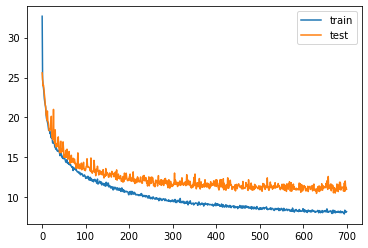

In [11]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

110/110 [==============================] - 0s 1ms/step


In [13]:
print("RMSE on Test Data = ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE on Test Data = ", metrics.mean_absolute_error(y_test, y_pred))
print("R2 on Test Data = ", metrics.r2_score(y_test, y_pred))

RMSE on Test Data =  3.3160155
MAE on Test Data =  2.3535597
R2 on Test Data =  0.5841615193090982


In [14]:
df1 = DataFrame({'Actual': y_test, 'Predicted': y_pred, 'variance': y_test - y_pred})
df1.head()

,Actual,Predicted,variance
0,0.0,1.074322,-1.074322
1,1.0,2.087986,-1.087986
2,0.0,0.478742,-0.478742
3,3.0,3.668377,-0.668377
4,1.0,0.712556,0.287444


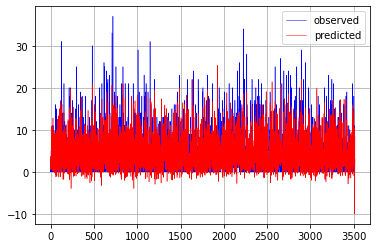

In [15]:
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=0.5, color='blue', label='observed')
plt.plot(x_ax, y_pred, lw=0.5, color='red', label='predicted')
plt.legend(loc='best')
plt.grid()